XGBoost Model

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from datetime import datetime
import shap
import matplotlib.pyplot as plt

# Load the keystreams and random streams
keystreams_df = pd.read_csv('1.csv')
random_streams_df = pd.read_csv('random_streams.csv')

keystreams = keystreams_df.values.tolist()
random_streams = random_streams_df.values.tolist()

# Generate labels
num_streams = len(keystreams)
labels_keystreams = [1] * num_streams
labels_random = [0] * num_streams

# Combine data and labels
combined_data = keystreams + random_streams
combined_labels = labels_keystreams + labels_random

# Create DataFrame
combined_df = pd.DataFrame(combined_data)
combined_df['label'] = combined_labels

# Split features and labels
X = combined_df.drop(columns=['label'])
y = combined_df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Start time before model
start_time = datetime.now()

# XGBoost classifier
model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Predictions and Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# End time
end_time = datetime.now()
print(f"XGBoost Accuracy: {accuracy:.4f}")
print(f"Time Taken by XGBoost: {end_time - start_time}")

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:05:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.6348
Time Taken by XGBoost: 0:01:05.412283


SHAP


Explaining model predictions using SHAP...


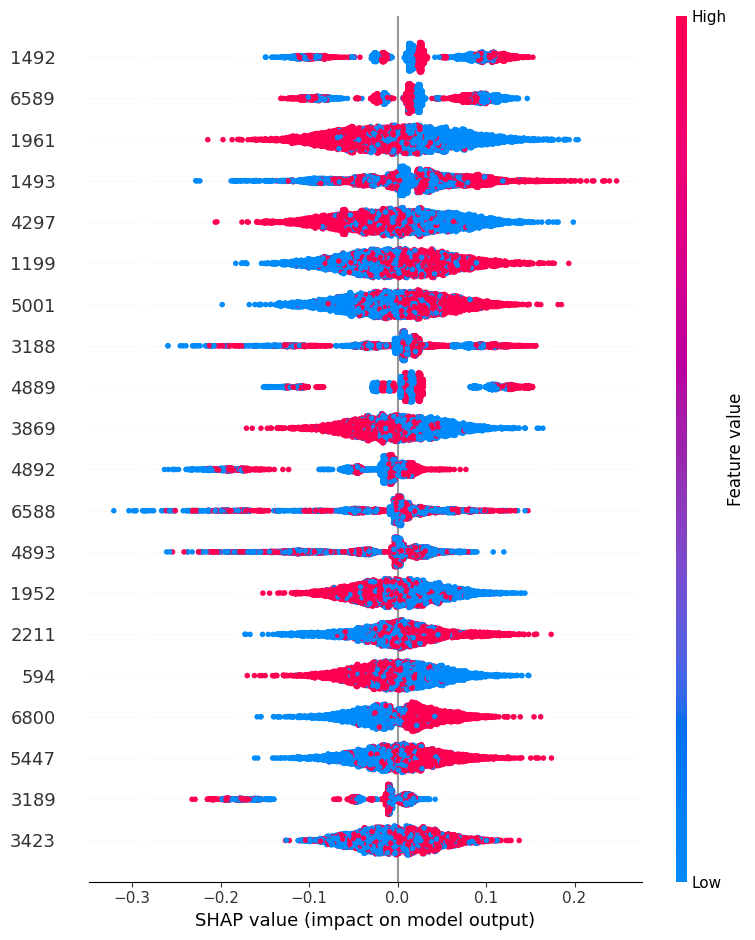

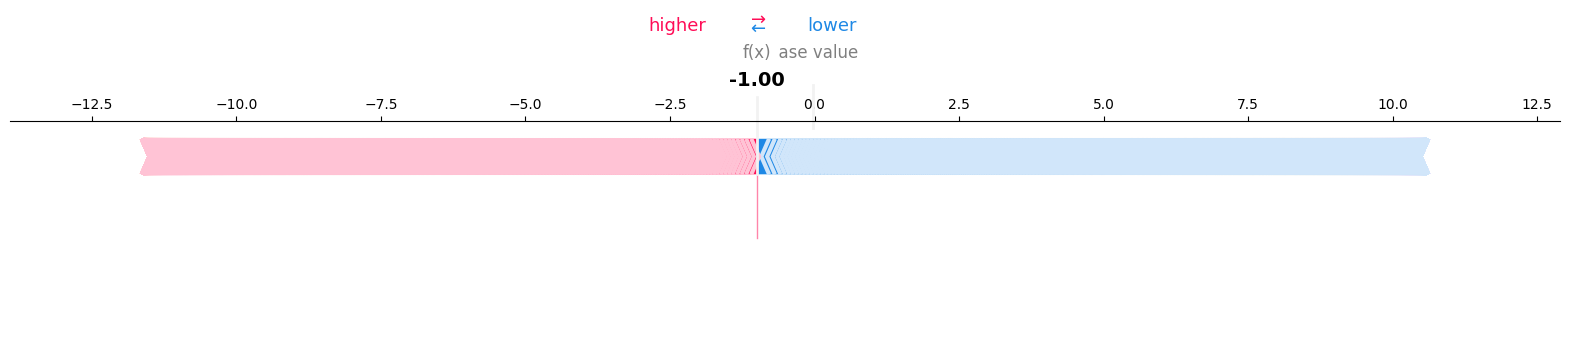

Time Taken by SHAP: 0:00:17.426685


In [2]:
print("\nExplaining model predictions using SHAP...")

# Start time for SHAP
start_time_shap = datetime.now()

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

# Force plot (1 sample example)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0], matplotlib=True)


# End time for SHAP
end_time_shap = datetime.now()

print(f"Time Taken by SHAP: {end_time_shap - start_time_shap}")

LIME

In [5]:
%pip install lime

import lime
import lime.lime_tabular
import numpy as np # Import numpy

# LIME Explanation
print("\nExplaining one prediction using LIME...")
start_time_lime = datetime.now()

# Create explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values, # Convert X_train to numpy array
    mode='classification',
    feature_names=[str(i) for i in range(X.shape[1])],
    class_names=['Random Stream', 'Keystream'],
    discretize_continuous=True
)

# Choose one test instance
i = 5  # <-- change index for different instances
instance = X_test.iloc[i].values # Convert selected test instance to numpy array

# Explain the prediction
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=model.predict_proba,
    num_features=10  # top 10 important features
)

# Visualize explanation
exp.show_in_notebook(show_table=True, show_all=False)
# Fidelity score (R² of the local surrogate model)
fidelity_score = exp.score
print(f"Fidelity Score (R²): {fidelity_score:.4f}")

end_time_lime = datetime.now()

print(f"Time Taken by LIME: {end_time_lime - start_time_lime}")


Explaining one prediction using LIME...


Fidelity Score (R²): 0.0138
Time Taken by LIME: 0:01:03.077867
